In [128]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(42)

In [129]:
c = np.exp(-1 * 1/2)

In [130]:
def f_x(x):
    return np.exp((-x**2)/2)

def g_x(x):
    return np.exp(-(x-1))

In [131]:
# integral of fx from 1 to inf
int_f = np.trapz(f_x(np.linspace(1, 10, 1000)), np.linspace(1, 10, 1000))
# integral of gx from 1 to inf
int_g = np.trapz(g_x(np.linspace(1, 10, 1000)), np.linspace(1, 10, 1000))

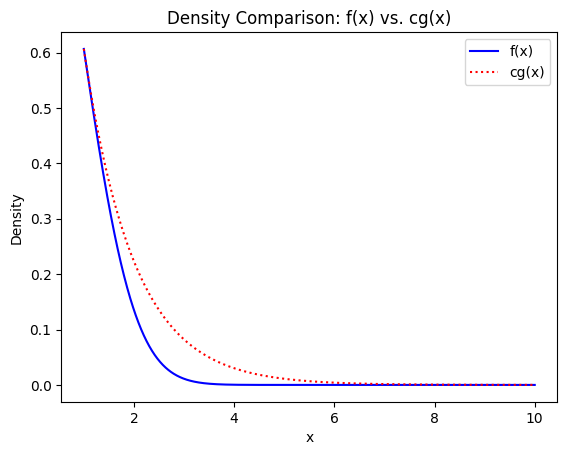

In [132]:
# QUESTION 2 plotting
x_values = np.linspace(1, 10, 1000)
# Plot f(x) and cg(x)
plt.plot(x_values, f_x(x_values), label='f(x)', color='blue')
plt.plot(x_values, c * g_x(x_values), label='cg(x)', linestyle='dotted', color='red')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Density Comparison: f(x) vs. cg(x)')
plt.legend()
plt.show()

In [133]:
# Calculate the expected mean runtime
expected_mean_runtime = c / int_f

In [134]:
# Define the normalized function
def f_norm(x):
    return f_x(x) / int_f

In [135]:
# Rejection sampling function
def rej_samp(N): 
    """
        N is the number of samples 
        
        repeatedly generates x_prop from the proposal distribution
    """
    samples = []
    for _ in range(N):
        while True:
            x_prop = np.random.exponential(scale=1) + 1
            acceptance_prob = f_x(x_prop) / (c * g_x(x_prop))
            if np.random.rand() < acceptance_prob: # if rand num is less then accep add it as a sample 
                samples.append(x_prop)
                break
    return np.array(samples)

In [136]:
samp_val = rej_samp(10000)  # Generate 10,000 samples
actual_mean_runtime = np.mean(samp_val)

In [137]:
# Plot the sample distribution and the normalized function
x_values = np.linspace(1, 3, 1000)
y_f_norm = f_norm(x_values)

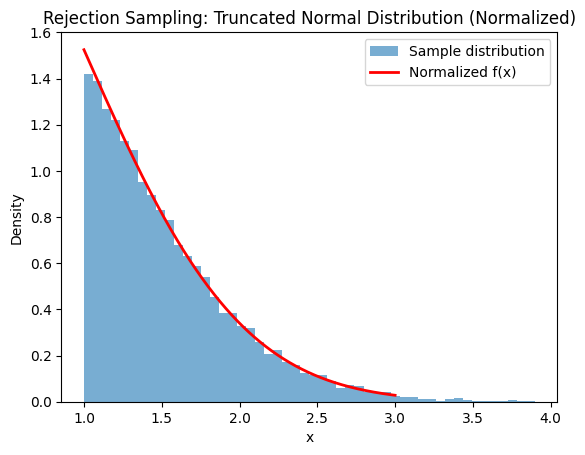

Expected mean runtime (calculated): 1.5251195440781558
Actual mean runtime (sampled): 1.5303990127306846


In [138]:
# Plot the sample distribution
plt.hist(samp_val, bins=50, density=True, alpha=0.6, label='Sample distribution')
plt.plot(x_values, y_f_norm, label='Normalized f(x)', color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling: Truncated Normal Distribution (Normalized)')
plt.legend()
plt.show()

print("Expected mean runtime (calculated):", expected_mean_runtime)
print("Actual mean runtime (sampled):", actual_mean_runtime)